# FEATURE ENGINEERING.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.shape

(150, 5)

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [6]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


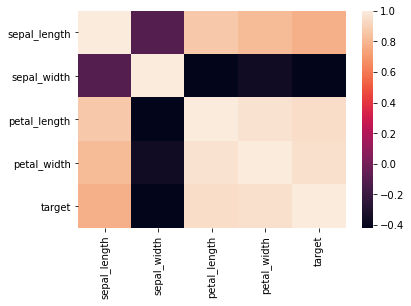

In [8]:
import seaborn as sb
sb.heatmap(data.corr())

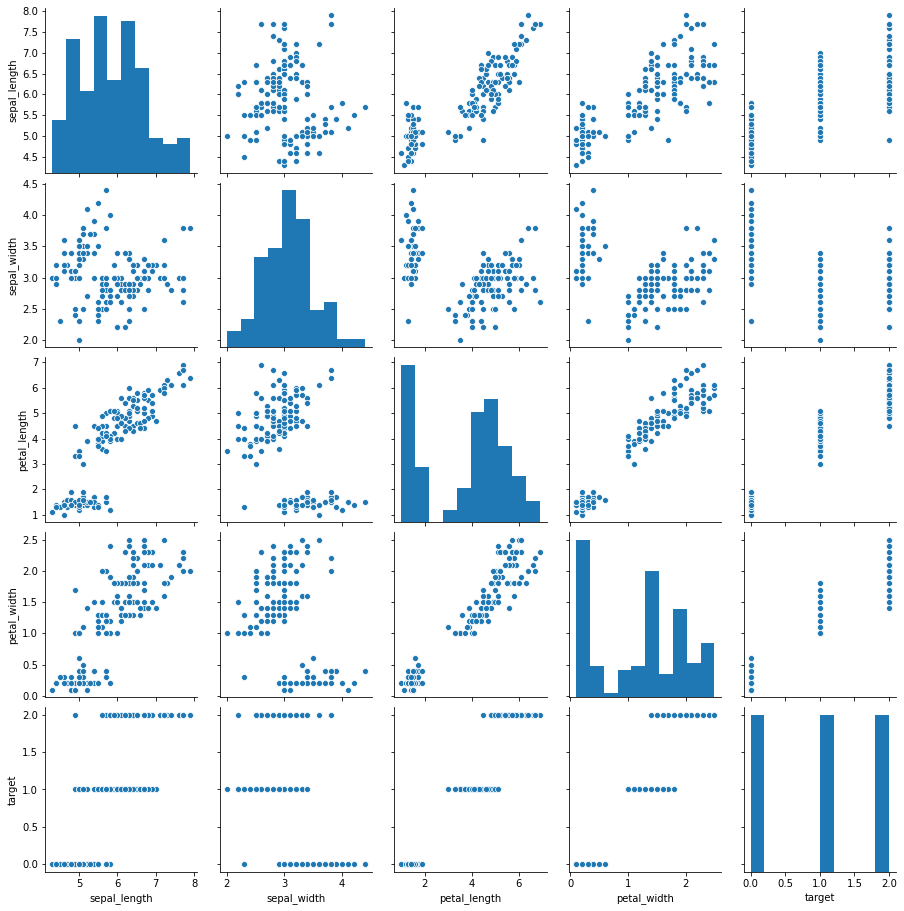

In [9]:
sb.pairplot(data)

In [10]:
X=data.iloc[:,:-1]
y=data.target

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

model=RandomForestClassifier(random_state=10,n_estimators=100)

model.fit(X_train,y_train)

y_predict=model.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.9777777777777777


In [12]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2
target,,,
0,14,0,0
1,0,16,1
2,0,0,14


### Applying PCA

In [13]:
pca=PCA() # apply PCA

In [14]:
pca.fit_transform(X)

array([[-2.68420713e+00,  3.26607315e-01, -2.15118370e-02,
         1.00615724e-03],
       [-2.71539062e+00, -1.69556848e-01, -2.03521425e-01,
         9.96024240e-02],
       [-2.88981954e+00, -1.37345610e-01,  2.47092410e-02,
         1.93045428e-02],
       [-2.74643720e+00, -3.11124316e-01,  3.76719753e-02,
        -7.59552741e-02],
       [-2.72859298e+00,  3.33924564e-01,  9.62296998e-02,
        -6.31287327e-02],
       [-2.27989736e+00,  7.47782713e-01,  1.74325619e-01,
        -2.71468037e-02],
       [-2.82089068e+00, -8.21045110e-02,  2.64251085e-01,
        -5.00996251e-02],
       [-2.62648199e+00,  1.70405349e-01, -1.58015103e-02,
        -4.62817610e-02],
       [-2.88795857e+00, -5.70798026e-01,  2.73354061e-02,
        -2.66154143e-02],
       [-2.67384469e+00, -1.06691704e-01, -1.91533300e-01,
        -5.58909660e-02],
       [-2.50652679e+00,  6.51935014e-01, -6.92749958e-02,
        -1.66082478e-02],
       [-2.61314272e+00,  2.15206320e-02,  1.07650353e-01,
      

In [15]:
X=pd.DataFrame(pca.fit_transform(X)) # to convert array form to dataframe 
X.head() # in below 0,1,2,3 are PC's i.e PC1,PC2,PC3,PC4

,0,1,2,3
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129


In [16]:
pca.explained_variance_ratio_ # to analyze the PC's

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

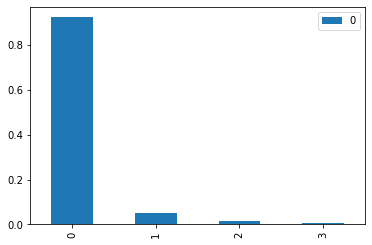

In [17]:
iris_var=pd.DataFrame(pca.explained_variance_ratio_) #reprenting varience-ratio
iris_var.plot(kind='bar')

In [18]:
X=X.iloc[:,:-2] # Taking only 2 PC's and predicting accuracy

In [19]:
X.head(2)

,0,1
0,-2.684207,0.326607
1,-2.715391,-0.169557


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

model=RandomForestClassifier(random_state=10,n_estimators=100)

model.fit(X_train,y_train)

y_predict=model.predict(X_test)
print(accuracy_score(y_test,y_predict))

1.0


In [24]:
# above we got 100% accuracy as 1.0 using pca but if we change random state accuracy changes